In [ ]:
#This code block only need to be ran once to save the model to local. After this, you only need to load the local model.
from optimum.onnxruntime import ORTStableDiffusionXLPipeline

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline_rocm = ORTStableDiffusionXLPipeline.from_pretrained(
    model_id,
    export=True,
    provider="ROCMExecutionProvider",
)
pipeline_rocm.save_pretrained("sdxl_onnx_base")

In [ ]:
from optimum.onnxruntime import ORTStableDiffusionXLPipeline

pipeline_rocm = ORTStableDiffusionXLPipeline.from_pretrained(
    "./sdxl_onnx_base", export=False, provider="ROCMExecutionProvider"
)

100%|██████████| 50/50 [01:30<00:00,  1.80s/it]


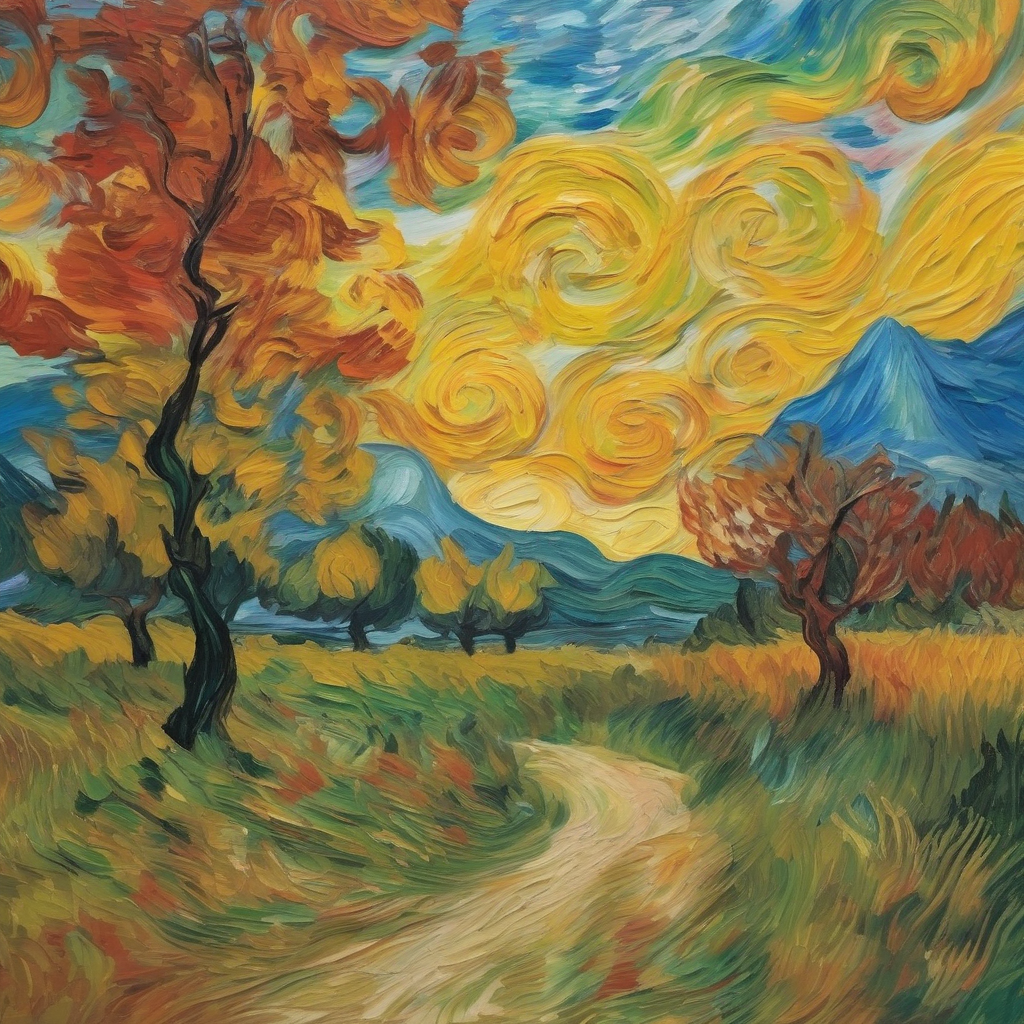

In [ ]:
# prompt = "the house in the forest, dark night, leaves in the air, fluorescent mushrooms, clear focus, very coherent, very detailed, contrast, vibrant, digital painting"
# prompt = "A photorealistic portrait of a young woman with flowing red hair and piercing green eyes, smiling warmly against a backdrop of lush greenery."
# prompt = "A classic oil painting depicting a grand banquet scene, with nobles and ladies adorned in exquisite attire feasting under a chandelier's soft glow."
# prompt = "A pixel art rendition of a bustling cyberpunk cityscape, neon lights illuminating skyscrapers and holographic advertisements casting a vibrant glow."
prompt = "A Van Gogh-inspired landscape painting, capturing the swirling brushstrokes and vibrant colors characteristic of the artist's style."
images = pipeline_rocm(prompt=prompt).images[0]
images.show()

In [ ]:
from diffusers.utils import load_image, make_image_grid
from optimum.onnxruntime import ORTStableDiffusionXLImg2ImgPipeline

pipeline = ORTStableDiffusionXLImg2ImgPipeline.from_pretrained(
    "./sdxl_onnx_base", export=False, provider="ROCMExecutionProvider"
)

100%|██████████| 15/15 [00:15<00:00,  1.04s/it]


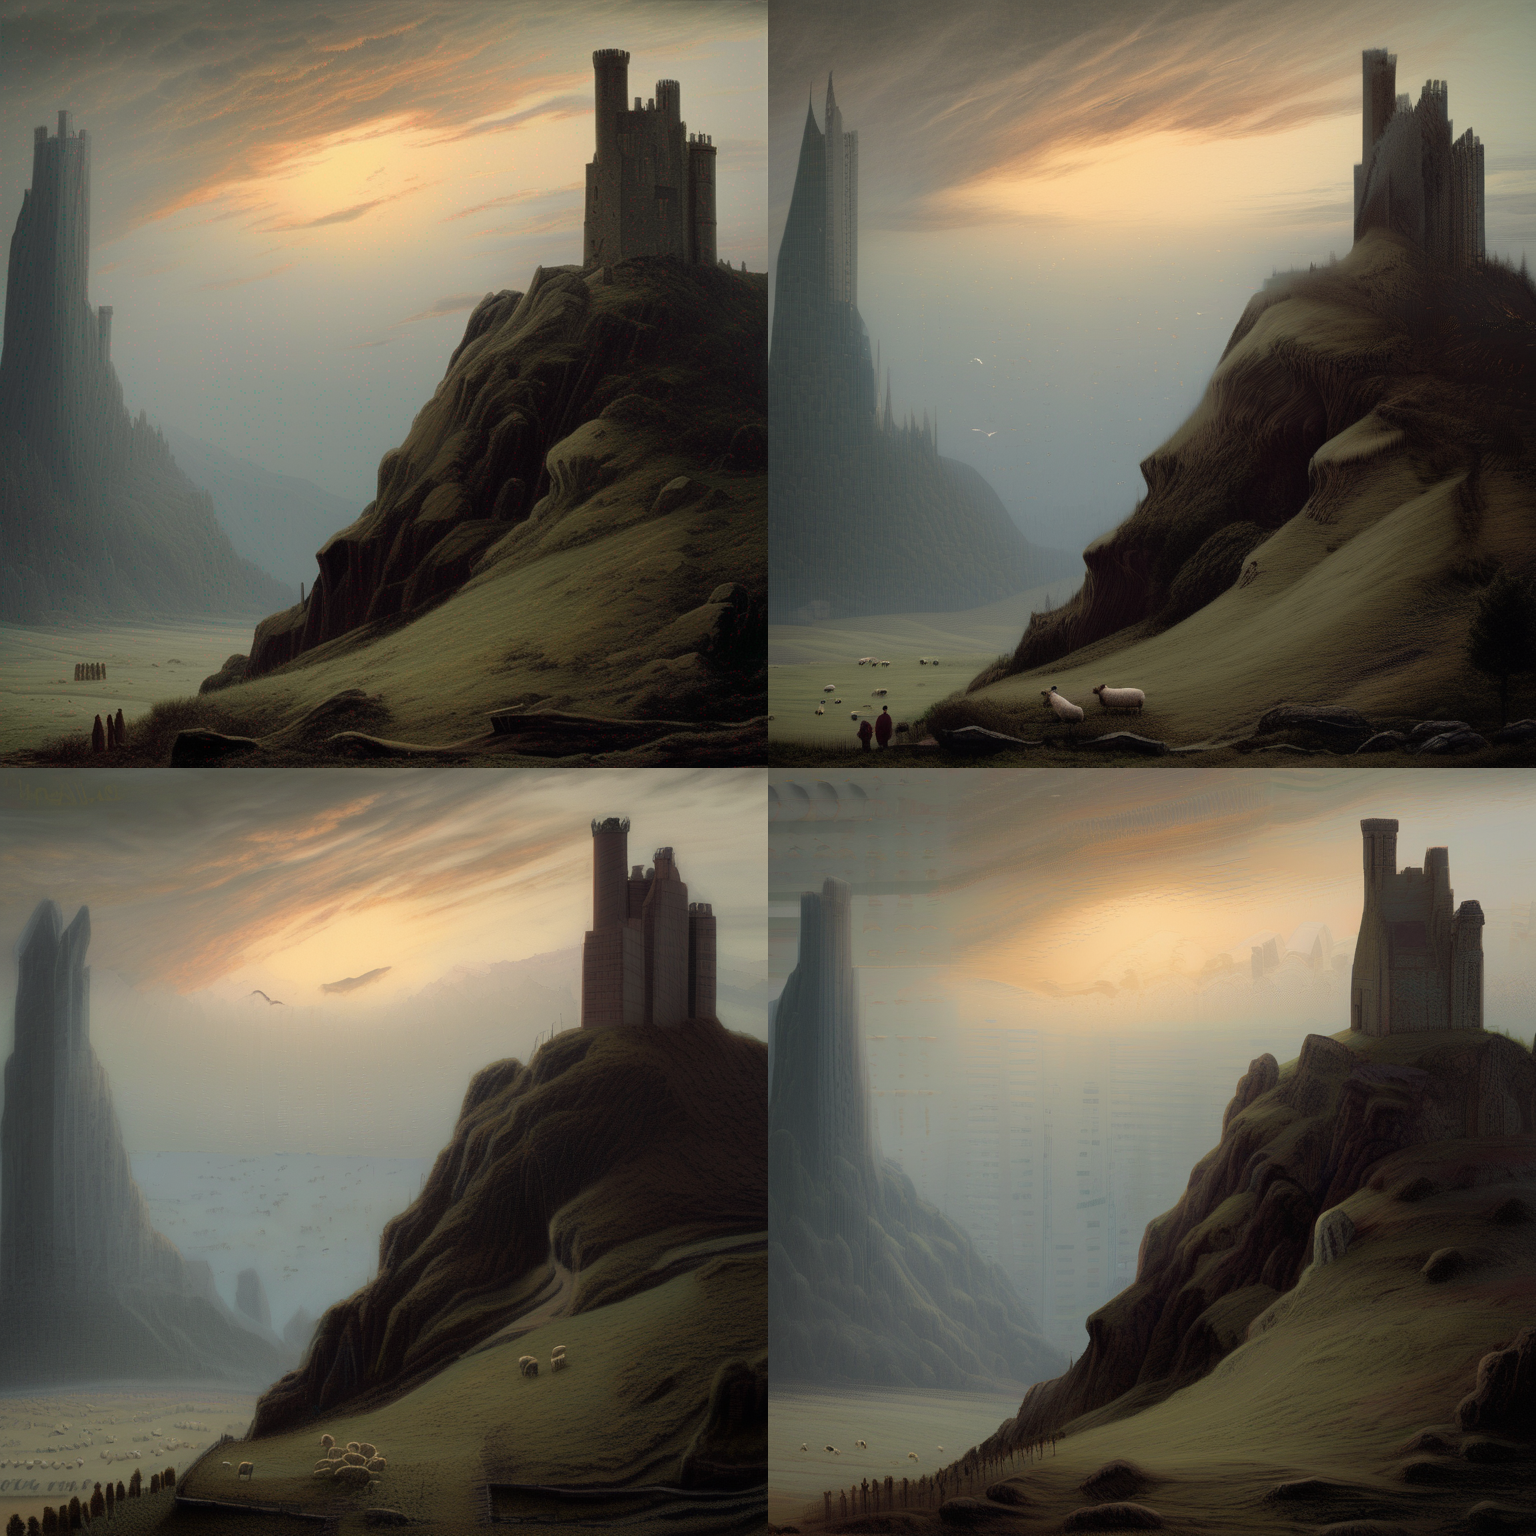

In [ ]:
url = "https://huggingface.co/datasets/optimum/documentation-images/resolve/main/intel/openvino/sd_xl/castle_friedrich.png"
image_in = load_image(url).convert("RGB")
prompt = "A multitude of sheep blankets the hillside"
images = pipeline(prompt, image=image_in, num_images_per_prompt=3).images

make_image_grid([image_in, *images], rows=2, cols=2)

In [ ]:
#This code block only need to be ran once to save the model to local. After this, you only need to load the local model.
from optimum.onnxruntime import ORTStableDiffusionInpaintPipeline

pipeline_in = ORTStableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    export=True,
    provider="ROCMExecutionProvider",
)
pipeline_in.save_pretrained("sd_inpaint")

In [ ]:
from diffusers.utils import load_image, make_image_grid
from optimum.onnxruntime import ORTStableDiffusionInpaintPipeline

pipeline_in = ORTStableDiffusionInpaintPipeline.from_pretrained(
    "sd_inpaint", export=False, provider="ROCMExecutionProvider"
)

100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


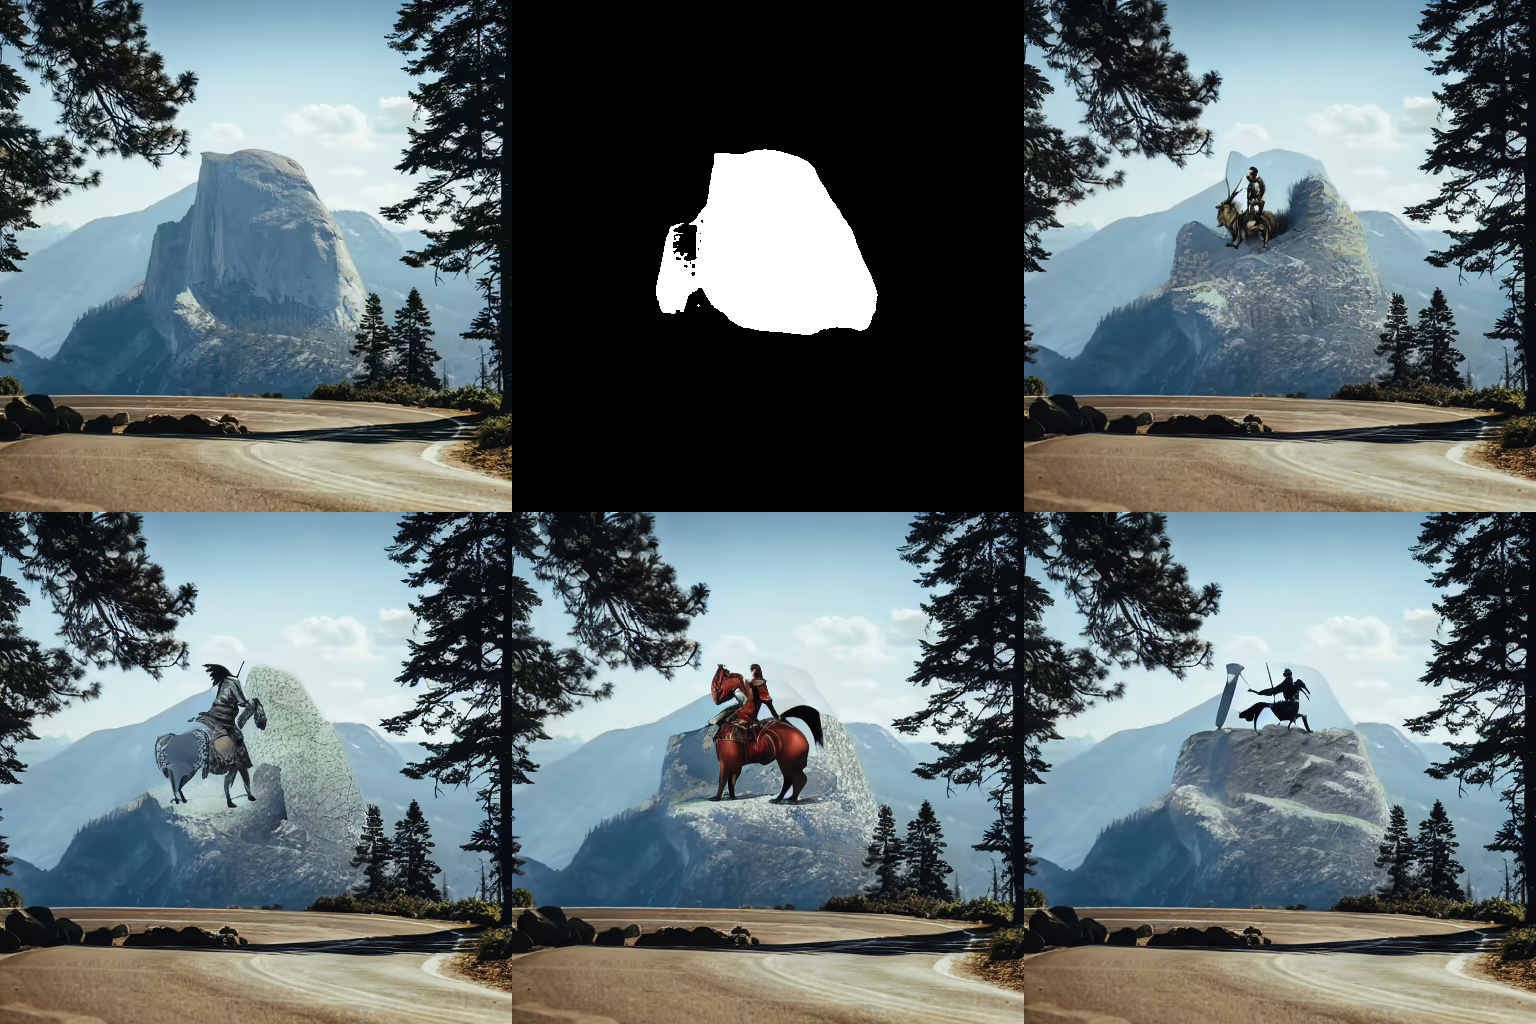

In [ ]:
# load base and mask image
init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png"
)
mask_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png"
)

prompt = "concept art of a Medieval Knight holding a sword riding on a horse on a huge stone, highly detailed, 8k"
image = pipeline_in(
    prompt=prompt, image=init_image, mask_image=mask_image, num_images_per_prompt=4
).images
make_image_grid([init_image, mask_image, *image], rows=2, cols=3)